In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop 
from keras.datasets import fashion_mnist # data set


Using TensorFlow backend.


###  Load the dataset

1. load the `fashion_mnist` dataset

2. preprocess the data:

 a) reshape `x` (train and test)to flat-vector representations: (N, 28x28)
 
 b) change the casting of `x` to `float32`
 
 c) normalize `x` by dividing its values by 255
 
 d) convert `y` to categorical "one-hot" representation (use: `keras.utils.to_categorical`)
 


before:
(60000, 28, 28)
after (trainig):
(60000, 784)


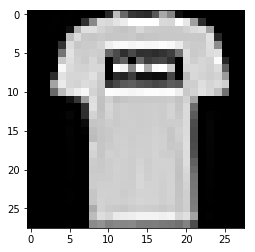

In [2]:
# your code here...
(x_train_get, y_train), (x_test_get, y_test) = fashion_mnist.load_data()
print("before:")
print(x_train_get.shape)

inShape = x_train_get.shape[1]*x_train_get.shape[2]
x_train = x_train_get.reshape(x_train_get.shape[0],inShape)
x_test = x_test_get.reshape(x_test_get.shape[0],inShape)

print("after (trainig):")
print(x_train.shape)

x_test = x_test / 255
x_train = x_train / 255
y_train_one_hot = keras.utils.to_categorical(y_train,y_train.max()+1)
y_test_one_hot = keras.utils.to_categorical(y_test,y_test.max()+1)

plt.imshow(x_train_get[1,:],'gray');

### 0-layers network

Create a 0-layers network, with only 10 output units (one for each class, with softmax activation).

Train and evaluate the network. Plot the results (loss and accuracy as a function of training epochs) for the training/testing data.

What is the maximal test accuracy you can achieve?


In [4]:
# your code here..
model = Sequential([Dense(10, input_shape=(inShape,)), 
                    Activation('softmax') ])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
histories = model.fit(x_train, y_train_one_hot, batch_size=10, epochs = 10,validation_data=(x_test,y_test_one_hot))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.5757 - acc: 0.8114 - val_loss: 0.5453 - val_acc: 0.8350
Epoch 2/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.5129 - acc: 0.8415 - val_loss: 0.5817 - val_acc: 0.8245
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.5037 - acc: 0.8476 - val_loss: 0.5634 - val_acc: 0.8339
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.5029 - acc: 0.8508 - val_loss: 0.5558 - val_acc: 0.8397
Epoch 5/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.5039 - acc: 0.8527 - val_loss: 0.5828 - val_acc: 0.8327
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.5048 - acc: 0.8544 - val_loss: 0.5776 - val_acc: 0.8402
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.5062 - acc: 0.8558 - val_loss: 0.5866 - val_acc

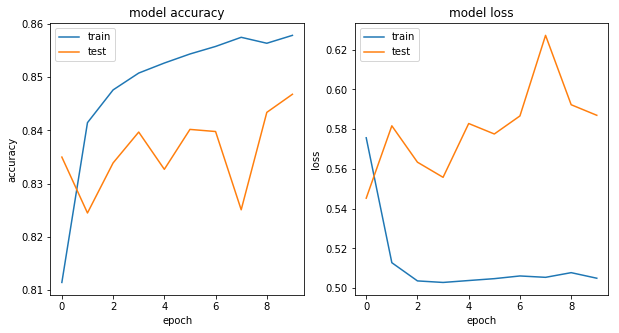

maximal accuracy of current model is: 84.67999936044215%


In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
lst = len(histories.history['val_acc']) - 1
print("maximal accuracy of current model is: {}%".format(histories.history['val_acc'][lst]*100))

### 1-hidden layer network

Add a fully connected hidden layer (64 units with ReLU activation).

Train and evaluate the network. Plot the results (loss and accuracy as a function of training epochs) for the training/testing data.

What is the maximal test accuracy you can achieve?


In [6]:
# your code here..
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=inShape))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
histories = model.fit(x_train, y_train_one_hot, batch_size=10, epochs = 10,validation_data=(x_test,y_test_one_hot))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.5045 - acc: 0.8221 - val_loss: 0.4674 - val_acc: 0.8421
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.4211 - acc: 0.8595 - val_loss: 0.4500 - val_acc: 0.8532
Epoch 3/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.4080 - acc: 0.8682 - val_loss: 0.4688 - val_acc: 0.8580
Epoch 4/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.4070 - acc: 0.8734 - val_loss: 0.4735 - val_acc: 0.8640
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.4114 - acc: 0.8768 - val_loss: 0.4809 - val_acc: 0.8537
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.4116 - acc: 0.8815 - val_loss: 0.5337 - val_acc: 0.8552
Epoch 7/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.4141 - acc: 0.8829 - val_loss: 0.5564 - 

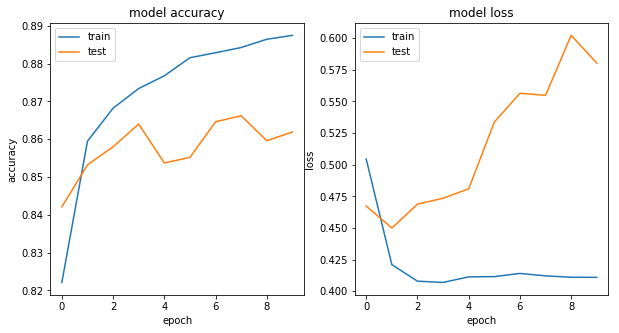

maximal accuracy of current model is: 86.1899993866682%


In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
lst = len(histories.history['val_acc']) - 1
print("maximal accuracy of current model is: {}%".format(histories.history['val_acc'][lst]*100))

### Exploring architectures

Try different architecutes: 

- try changing the number of units in the hidden layer (20, 100, 1000??)
- try changing the number of hidden layers (is deeper better than wider?)
- try adding dropout layers 

Summarize all your findings (in graphs and text/table).



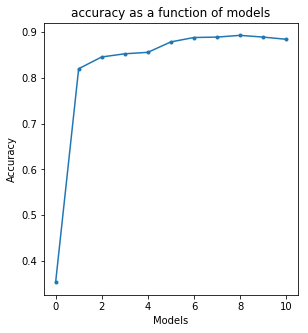

Model 0: 3-layers(1,1,10), No Dropout
Model 1: 3-layers(5,5,10), No Dropout
Model 2: 3-layers(10,10,10), No Dropout
Model 3: 3-layers(15,15,10), No Dropout
Model 4: 3-layers(20,20,10), No Dropout
Model 5: 3-layers(100,100,10), No Dropout
Model 6: 3-layers(150,150,10), No Dropout
Model 7: 3-layers(150,150,10), Dropout(0.1,0.1)
Model 8: 3-layers(200,220,10), Dropout(0.1,0.2)
Model 9: 3-layers(300,300,10), Dropout(0.1,0.5)
Model 10: 3-layers(500,500,10), Dropout(0.1,0.5)
From the above data, we can observe an accuracy jump from ~0.3 to ~0.8 when moving from Model 0 to Model 1.
The additon of more units and dropout layers in the following Models(2,3,...,10) doesn't lead to significant increase in accuracy.
----------------------
Below the best model I was able to train:


In [3]:
# your code here..
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("accuracy as a function of models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.plot([0.3529,0.8199,0.8456,0.8525,0.8557,0.8785,0.8881,0.8890,0.8928,0.8890,0.8842],'.-')
plt.show()
print("Model 0: 3-layers(1,1,10), No Dropout")
print("Model 1: 3-layers(5,5,10), No Dropout")
print("Model 2: 3-layers(10,10,10), No Dropout")
print("Model 3: 3-layers(15,15,10), No Dropout")
print("Model 4: 3-layers(20,20,10), No Dropout")
print("Model 5: 3-layers(100,100,10), No Dropout")
print("Model 6: 3-layers(150,150,10), No Dropout")
print("Model 7: 3-layers(150,150,10), Dropout(0.1,0.1)")
print("Model 8: 3-layers(200,220,10), Dropout(0.1,0.2)")
print("Model 9: 3-layers(300,300,10), Dropout(0.1,0.5)")
print("Model 10: 3-layers(500,500,10), Dropout(0.1,0.5)")
print("From the above data, we can observe an accuracy jump from ~0.3 to ~0.8 when moving from Model 0 to Model 1.")
print("The additon of more units and dropout layers in the following Models(2,3,...,10) doesn't lead to significant increase in accuracy.")
print("----------------------")
print("Below the best model I was able to train:")

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 44s 734us/step - loss: 0.6637 - acc: 0.7612 - val_loss: 0.4895 - val_acc: 0.8208
Epoch 2/15
60000/60000 [==============================] - 20s 332us/step - loss: 0.4372 - acc: 0.8407 - val_loss: 0.4298 - val_acc: 0.8468
Epoch 3/15
60000/60000 [==============================] - 18s 307us/step - loss: 0.3838 - acc: 0.8596 - val_loss: 0.4087 - val_acc: 0.8524
Epoch 4/15
60000/60000 [==============================] - 18s 292us/step - loss: 0.3532 - acc: 0.8701 - val_loss: 0.3718 - val_acc: 0.8647
Epoch 5/15
60000/60000 [==============================] - 18s 300us/step - loss: 0.3344 - acc: 0.8758 - val_loss: 0.3640 - val_acc: 0.8646
Epoch 6/15
60000/60000 [==============================] - 18s 304us/step - loss: 0.3188 - acc: 0.8814 - val_loss: 0.3436 - val_acc: 0.8756
Epoch 7/15
60000/60000 [==============================] - 18s 304us/step - loss: 0.3003 - acc: 0.8897 - val_loss: 0.

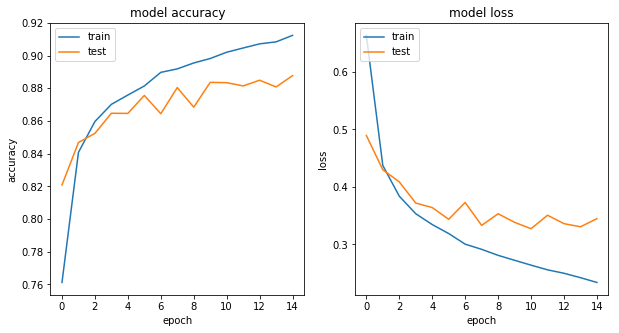

maximal accuracy of current model is: 88.77000000000001%


In [4]:
model = Sequential()
model.add(Dense(200,activation='relu',input_dim=inShape))
model.add(Dropout(0.1))
model.add(Dense(220,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
histories = model.fit(x_train, y_train_one_hot, batch_size=300, epochs = 15,validation_data=(x_test,y_test_one_hot))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histories.history['acc'])
plt.plot(histories.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(histories.history['loss'])
plt.plot(histories.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
lst = len(histories.history['val_acc']) - 1
print("maximal accuracy of current model is: {}%".format(histories.history['val_acc'][lst]*100))
    
      


## Good Luck!